# Titanic Survival Prediction

### History Of Titanic Dataset
**The Titanic dataset is one of the most famous datasets used in the fields of machine learning, data science, and statistics. It contains information about the passengers aboard the RMS Titanic, which sank on April 15, 1912, during its maiden voyage from Southampton to New York after hitting an iceberg. The sinking resulted in the loss of over 1,500 lives, making it one of the deadliest peacetime maritime disasters in history.

### Historical Context of the Titanic Dataset

#### The RMS Titanic:
The Titanic was one of the largest and most luxurious passenger liners of its time, operated by the White Star Line. It was considered "unsinkable" due to its advanced safety features, including watertight compartments. However, the ship did not have enough lifeboats for all passengers, contributing to the high loss of life.

#### The Disaster:
On April 14, 1912, the Titanic struck an iceberg in the North Atlantic Ocean. The collision caused the ship's hull to rupture, and it began sinking rapidly. By the early hours of April 15, the Titanic was completely submerged, with only a fraction of its passengers and crew surviving.

#### Origin of the Titanic Dataset

The Titanic dataset comes from detailed passenger records maintained during the voyage and disaster. These records have been used by historians, researchers, and statisticians to analyze the demographics and survival rates of the passengers. The dataset was later adapted for computational use, particularly for machine learning and data analysis tasks.

Key Events in the Dataset's History

Initial Data Collection (1912):
After the Titanic sank, numerous inquiries were conducted to investigate the disaster, such as the British Wreck Commissioner's Inquiry and the U.S. Senate Inquiry. These investigations compiled extensive lists of passengers and crew, including their names, ticket classes, genders, ages, and whether they survived or perished.

Digitization of Data:
As computing technology advanced, researchers began digitizing historical records for easier analysis. The Titanic dataset was transformed from historical logs and lists into structured formats that could be used in statistical software and later for machine learning algorithms.

Introduction in Data Science Competitions (2012):
One of the most significant moments in the history of the Titanic dataset's use in data science was when Kaggle, a popular platform for data science competitions, introduced it as an entry-level problem. The Kaggle Titanic Machine Learning Competition asks participants to create a predictive model that determines whether a passenger survived the sinking based on their features (e.g., gender, class, age). This helped cement the Titanic dataset as a popular tool for teaching binary classification and data science concepts.

Expansion and Variations of the Dataset:
Since its inclusion on Kaggle, the dataset has been modified and extended by various data science communities. Different versions of the dataset include additional features, such as detailed family relationships, socio-economic status indicators, and cabin locations.

Use in Academic Research:
The dataset has also been used in various academic studies to explore socio-economic factors, survival rates, and even behavioral economics. Researchers have analyzed it to understand how human decision-making in life-threatening situations was influenced by social status, gender norms, and access to resources.**

resources from : Nikita Haribhau Kale

# Business Understanding
**The main goal of this project is to predict which passengers survived the Titanic disaster based on features such as age, gender, and class**

In [196]:

# import libraries
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing and modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

## Understanding the Data¶
** PassengerId: Unique ID for each passenger.

Survived: Target variable (1 if the passenger survived, 0 if they did not).

Pclass: Passenger class (1st, 2nd, or 3rd class).

Name: Passenger's name.

Sex: Gender of the passenger.

Age: Age of the passenger.

SibSp: Number of siblings or spouses aboard the Titanic.

Parch: Number of parents or children aboard.

Ticket: Ticket number.

Fare: Fare paid by the passenger.

Cabin: Cabin number (may have many missing values).

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).**

# Load Exploratory Data

In [199]:
df = pd.read_csv("C:\\Users\\sulai\\Downloads\\RD INFRO TECHNOLOGY\\tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [200]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Information About the Data set

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Summary Statistics

In [204]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [205]:
df.shape

(418, 12)

In [206]:
df.duplicated().sum()

0

In [207]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Detecting Missing Values

In [209]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**filling Age missing value**

In [211]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

**filling Fare missing value**

In [213]:
df['Fare'] = df['Fare'].fillna(df['Age'].mean())

**filling Cabin missing value**

In [215]:
df['Cabin'].fillna('unknown',inplace=True)

In [216]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

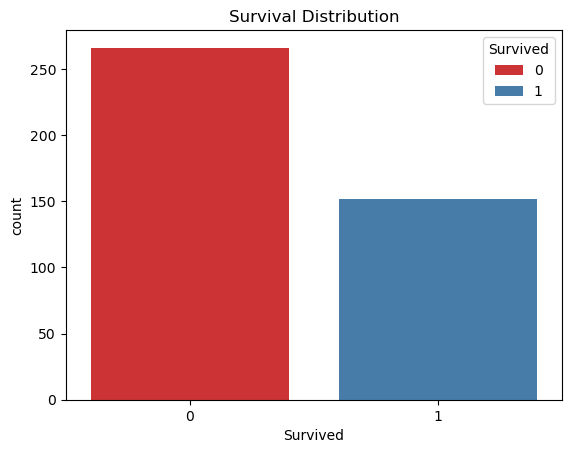

In [217]:
# Chek distribution of the target variable (Survived)
sns.countplot(data=df,x='Survived',palette='Set1',hue='Survived')
plt.title('Survival Distribution')
plt.show()

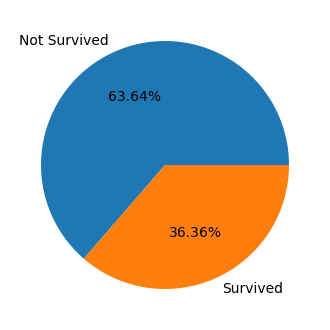

In [218]:
plt.figure(figsize=(4,6))
plt.pie(df['Survived'].value_counts(),labels=['Not Survived','Survived'],autopct='%1.2f%%')
plt.show()

In [219]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

266 people did not survive

152 people survived

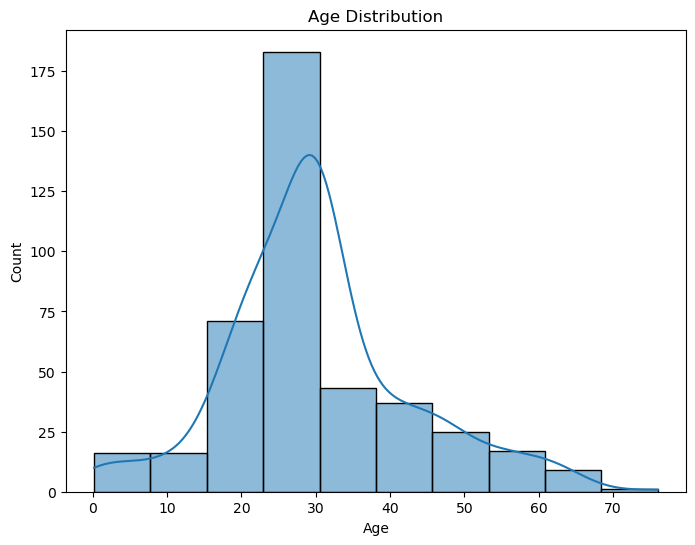

In [221]:
#Distribution of Age
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],bins=10,kde=True)
plt.title('Age Distribution')
plt.show()

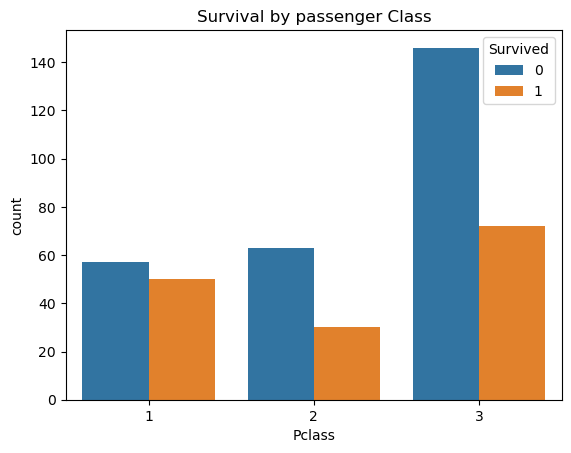

In [222]:
#Analyze column Pclass 
sns.countplot(x='Pclass',hue='Survived', data=df)
plt.title('Survival by passenger Class')
plt.show()

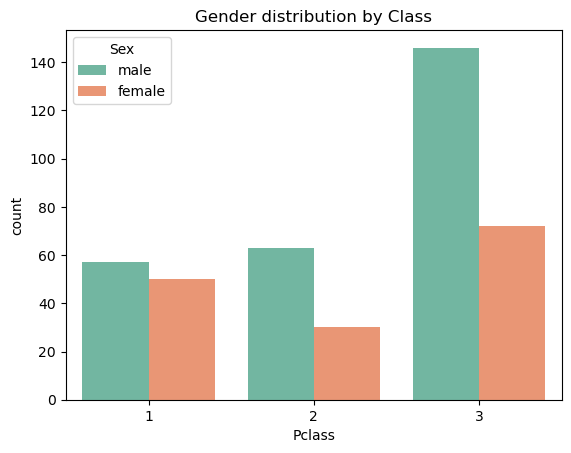

In [223]:
sns.countplot(x='Pclass',hue='Sex', data=df, palette='Set2')
plt.title('Gender distribution by Class')
plt.show()

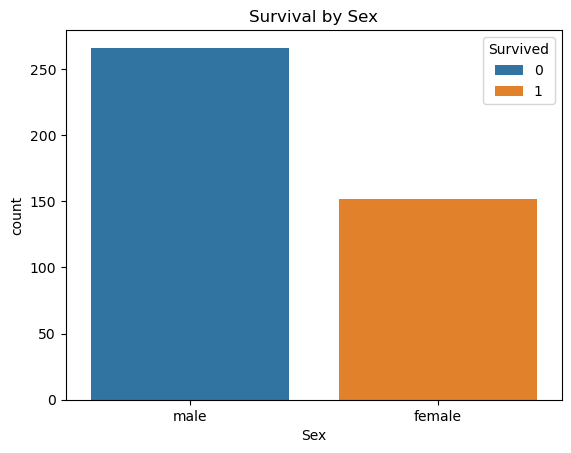

In [224]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

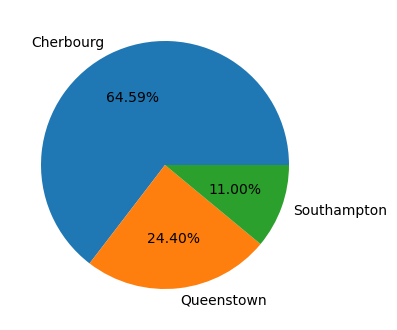

In [225]:
plt.figure(figsize=(4,6))
plt.pie(df['Embarked'].value_counts(),labels=['Cherbourg','Queenstown','Southampton'],autopct='%1.2f%%')
plt.show()

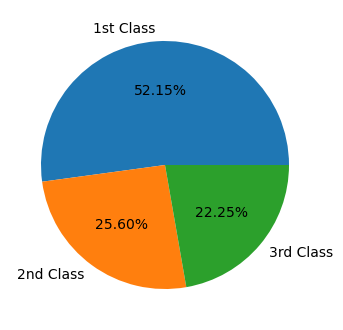

In [226]:
plt.figure(figsize=(4,6))
plt.pie(df['Pclass'].value_counts(),labels=['1st Class','2nd Class','3rd Class'],autopct='%1.2f%%')
plt.show()

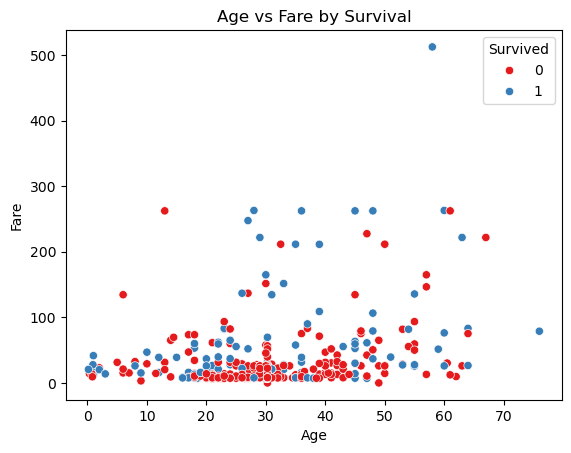

In [227]:
sns.scatterplot(data=df,x='Age',y='Fare',hue='Survived',palette='Set1')
plt.title('Age vs Fare by Survival')
plt.show()

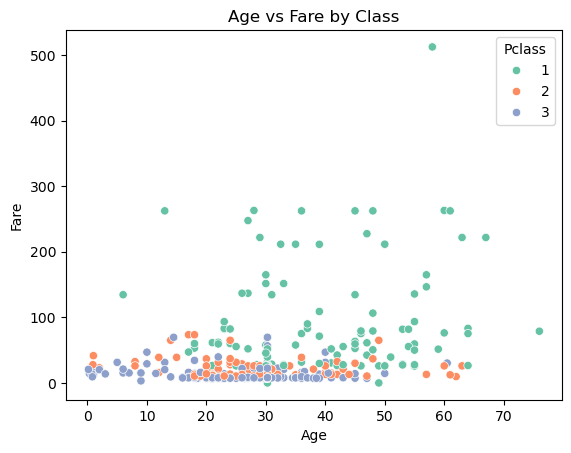

In [228]:
sns.scatterplot(x='Age', y='Fare', data=df, hue='Pclass', palette='Set2')
plt.title('Age vs Fare by Class')
plt.show()

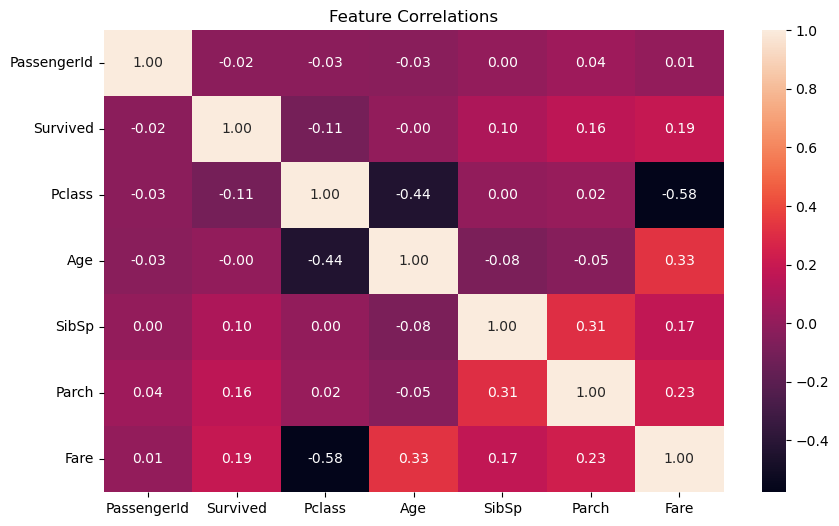

In [229]:
# Correlation heatmap
col_num=df.select_dtypes(exclude="object").columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[col_num].corr(), annot=True, 
            
            fmt='.2f')
plt.title('Feature Correlations')
plt.show()

## Feature Engineering

In [231]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(df['Title'].value_counts())

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [232]:
df.drop('Cabin',axis=1,inplace=True)

In [233]:
# Group rare titles
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [234]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,Mr
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,Rare
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,Mr


In [235]:
print(df['Title'].value_counts())

Title
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: count, dtype: int64


In [236]:
# Convert categorical 'Sex', 'Embarked', and 'Title' to numerical values using LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Title'] = le.fit_transform(df['Title'])

In [237]:
# Create a family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [238]:
# Drop irrelevant columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [239]:
#check is null
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

### Feature Scaling

In [241]:
X = df.drop(columns='Survived')
y = df['Survived']


In [242]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [243]:
# Check the shapes of the resulting datasets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (292, 9)
Testing set features shape: (126, 9)
Training set target shape (292,)
Testing set target shape: (126,)


In [244]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [287]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [293]:
y_pred_lr = lr.predict(X_test)

In [297]:
accuracy = accuracy_score(y_test,y_pred_lr)
print('Accuracy:', accuracy)
classification_rep = classification_report(y_test,y_pred_lr)
print('Classification Report:\n',classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



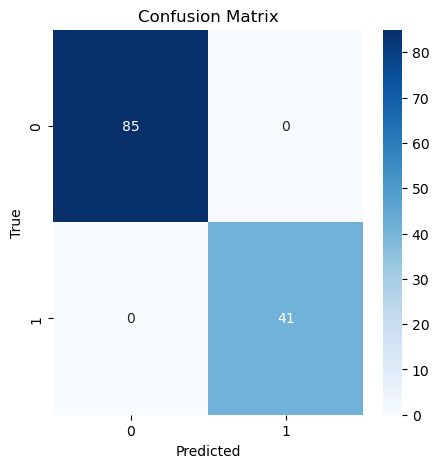

In [299]:
cm = confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [301]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [303]:
y_pred_dtc=dt.predict(X_test)

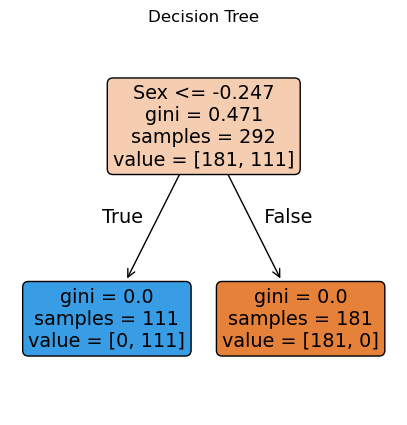

In [307]:
plt.figure(figsize=(5,5))
plot_tree(dt,filled=True,feature_names=X.columns,rounded=True)
plt.title('Decision Tree')
plt.show()

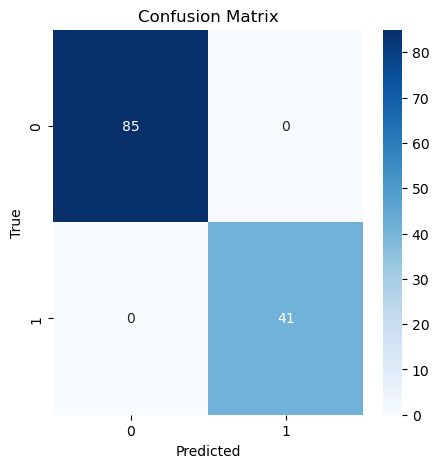

In [309]:
plt.figure(figsize=(5,5))
cm=confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [311]:
accuracy=accuracy_score(y_test,y_pred_dtc)
print('Accuracy:',accuracy)
classification_rep=classification_report(y_test,y_pred_dtc)
print('Classification Report:\n',classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [315]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [317]:
y_pred_rfc = rf.predict(X_test)

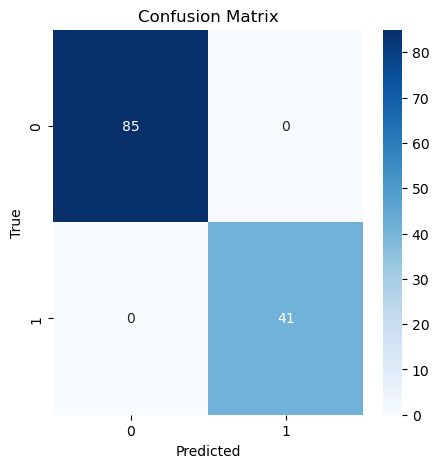

In [319]:
plt.figure(figsize=(5,5))
cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [321]:
accuracy=accuracy_score(y_test,y_pred_rfc)
print('Accuracy:',accuracy)
classification_rep=classification_report(y_test,y_pred_rfc)
print('Classification Report:\n',classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [323]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [329]:
y_pred_svm =svm.predict(X_test)

In [331]:
accuracy=accuracy_score(y_test,y_pred_svm)
print('Accuracy:',accuracy)
classification_rep=classification_report(y_test,y_pred_svm)
print('Classification Report:\n',classification_rep)

Accuracy: 0.9920634920634921
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       1.00      0.98      0.99        41

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



In [350]:
from sklearn.ensemble import StackingClassifier
sc=StackingClassifier(estimators=[('dt',dt),('lr',lr),('rf',rf),('svm',svm)],final_estimator=LogisticRegression())
sc.fit(X_train,y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [354]:
y_pred_sc=sc.predict(X_test)

In [356]:
accuracy=accuracy_score(y_test,y_pred_sc)
print('Accuracy:',accuracy)
classification_rep=classification_report(y_test,y_pred_sc)
print('Classification Report:\n',classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



The StackingClassifier is the best choice among the models because it combines the predictions of multiple base models (dt, lr, rf, svm) using a meta-classifier (LogisticRegression). This ensemble approach leverages the strengths of each model, resulting in perfect accuracy (1.0) and robust performance. By combining diverse models, it reduces the risk of overfitting and improves generalization, making it more reliable for unseen data.

The Logistic Regression meta-classifier is chosen as the final estimator because it is interpretable, computationally efficient, and performs well on this dataset. It effectively combines the outputs of the base models without introducing unnecessary complexity, ensuring a balance between performance and simplicity. This makes the StackingClassifier a powerful and flexible solution for this classification task.

conclusion and key takewayes

1 . chance of female survival is higher than male survival

2 . traveling in pclass 3 was deadiest

3 . people in the age range of 20 to 40 had a higher chance of not surviving

4 . people travelling with samaller familes had a higher chance of surviving the accident in comparision to people with large fimilies and travling alone

5 .class and fare : higher class (1st or 2nd ) and higher fares significantly increased survival chance